<a href="https://colab.research.google.com/github/ivan-mihailov/LS-Unit-2-Sprint-1-Assignments/blob/main/Ivan_Mihailov_LS_DS_214_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 1, Module 4*

---

In [ ]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Linear-Models/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

# Module Project: Logistic Regression

Do you like burritos? 🌯 You're in luck then, because in this project you'll create a model to predict whether a burrito is `'Great'`.

The dataset for this assignment comes from [Scott Cole](https://srcole.github.io/100burritos/), a San Diego-based data scientist and burrito enthusiast. 

## Directions

The tasks for this project are the following:

- **Task 1:** Import `csv` file using `wrangle` function.
- **Task 2:** Conduct exploratory data analysis (EDA), and modify `wrangle` function .
- **Task 3:** Split data into feature matrix `X` and target vector `y`.
- **Task 4:** Split feature matrix `X` and target vector `y` into training and test sets.
- **Task 5:** Establish the baseline accuracy score for your dataset.
- **Task 6:** Build `model_logr` using a pipeline that includes three transfomers and `LogisticRegression` predictor. Train model on `X_train` and `X_test`.
- **Task 7:** Calculate the training and test accuracy score for your model.
- **Task 8:** Create a horizontal bar chart showing the 10 most influencial features for your  model. 
- **Task 9:** Demonstrate and explain the differences between `model_lr.predict()` and `model_lr.predict_proba()`.

**Note** 

You should limit yourself to the following libraries:

- `category_encoders`
- `matplotlib`
- `pandas`
- `sklearn`

# I. Wrangle Data

In [ ]:
def wrangle(filepath):
    # Import w/ DateTimeIndex
    df = pd.read_csv(filepath, parse_dates=['Date'],
                     index_col='Date')
    
    # Drop unrated burritos
    df.dropna(subset=['overall'], inplace=True)
    
    # Derive binary classification target:
    # We define a 'Great' burrito as having an
    # overall rating of 4 or higher, on a 5 point scale
    df['Great'] = (df['overall'] >= 4).astype(int)
    
    # Drop high cardinality categoricals
    df = df.drop(columns=['Notes', 'Location', 'Address', 'URL', 'Neighborhood'])
    
    # Drop columns to prevent "leakage"
    df = df.drop(columns=['Rec', 'overall'])

    # Drop columns with too many NaNs
    df = df.drop(columns=['Yelp', 'Google',	'Chips', 'Mass (g)',	'Density (g/mL)',	
                          'Unreliable',	'NonSD',	'Chicken',	'Shrimp', 'Fish',
                          'Rice',	'Beans',	'Lettuce',	'Tomato', 'Bell peper',	
                          'Carrots', 'Cabbage',	'Sauce',	'Salsa.1','Cilantro',	
                          'Onion',	'Taquito',	'Pineapple',	'Ham', 'Chile relleno',
                          'Nopales',	'Lobster',	'Queso',	'Egg', 'Mushroom',
                          'Bacon',	'Sushi',	'Avocado',	'Corn',	'Zucchini', 'Reviewer'])
    
    # Replace 'x' and 'X' in ingredient columns with '1'

    df['Beef'] = df['Beef'].replace(['x', 'X'], 1)
    df['Pico'] = df['Pico'].replace(['x', 'X'], 1)
    df['Guac'] = df['Guac'].replace(['x', 'X'], 1)
    df['Cheese'] = df['Cheese'].replace(['x', 'X'], 1)
    df['Fries'] = df['Fries'].replace(['x', 'X'], 1)
    df['Sour cream'] = df['Sour cream'].replace(['x', 'X'], 1)
    df['Pork'] = df['Pork'].replace(['x', 'X'], 1)

    # Replace NaNs in ingredient columns with '0'

    df['Beef'] = df['Beef'].fillna(0) 
    df['Pico'] = df['Pico'].fillna(0)
    df['Guac'] = df['Guac'].fillna(0)
    df['Cheese'] = df['Cheese'].fillna(0)
    df['Fries'] = df['Fries'].fillna(0)
    df['Sour cream'] = df['Sour cream'].fillna(0)
    df['Pork'] = df['Pork'].fillna(0)

    # Convert ingredient columns to integer

    df['Beef'] = df['Beef'].astype(int)
    df['Pico'] = df['Pico'].astype(int)
    df['Guac'] = df['Guac'].astype(int)
    df['Cheese'] = df['Cheese'].astype(int)
    df['Fries'] = df['Fries'].astype(int)
    df['Sour cream'] = df['Sour cream'].astype(int)
    df['Pork'] = df['Pork'].astype(int)
    
    return df

filepath = DATA_PATH + 'burritos/burritos.csv'

**Task 1:** Use the above `wrangle` function to import the `burritos.csv` file into a DataFrame named `df`.

In [ ]:
import pandas as pd
import numpy as np
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
filepath = DATA_PATH + 'burritos/burritos.csv'
df = wrangle(filepath)

During your exploratory data analysis, note that there are several columns whose data type is `object` but that seem to be a binary encoding. For example, `df['Beef'].head()` returns:

```
0      x
1      x
2    NaN
3      x
4      x
Name: Beef, dtype: object
```

**Task 2:** Change the `wrangle` function so that these columns are properly encoded as `0` and `1`s. Be sure your code handles upper- and lowercase `X`s, and `NaN`s.

In [ ]:
# Conduct your exploratory data analysis here
# And modify the `wrangle` function above.

If you explore the `'Burrito'` column of `df`, you'll notice that it's a high-cardinality categorical feature. You'll also notice that there's a lot of overlap between the categories. 

**Stretch Goal:** Change the `wrangle` function above so that it engineers four new features: `'california'`, `'asada'`, `'surf'`, and `'carnitas'`. Each row should have a `1` or `0` based on the text information in the `'Burrito'` column. For example, here's how the first 5 rows of the dataset would look.

| **Burrito** | **california** | **asada** | **surf** | **carnitas** |
| :---------- | :------------: | :-------: | :------: | :----------: |
| California  |       1        |     0     |    0     |      0       |
| California  |       1        |     0     |    0     |      0       |
|  Carnitas   |       0        |     0     |    0     |      1       |
| Carne asada |       0        |     1     |    0     |      0       |
| California  |       1        |     0     |    0     |      0       |

**Note:** Be sure to also drop the `'Burrito'` once you've engineered your new features.

In [ ]:
# Conduct your exploratory data analysis here
# And modify the `wrangle` function above.

In [ ]:
df.head(10)

,Burrito,Cost,Hunger,Length,Circum,Volume,Tortilla,Temp,Meat,Fillings,Meat:filling,Uniformity,Salsa,Synergy,Wrap,Beef,Pico,Guac,Cheese,Fries,Sour cream,Pork,Great
Date,,,,,,,,,,,,,,,,,,,,,,,
2016-01-18,California,6.49,3.0,NaN,NaN,NaN,3.0,5.0,3.0,3.5,4.0,4.0,4.0,4.0,4.0,1,1,1,1,1,0,0,0
2016-01-24,California,5.45,3.5,NaN,NaN,NaN,2.0,3.5,2.5,2.5,2.0,4.0,3.5,2.5,5.0,1,1,1,1,1,0,0,0
2016-01-24,Carnitas,4.85,1.5,NaN,NaN,NaN,3.0,2.0,2.5,3.0,4.5,4.0,3.0,3.0,5.0,0,1,1,0,0,0,1,0
2016-01-24,Carne asada,5.25,2.0,NaN,NaN,NaN,3.0,2.0,3.5,3.0,4.0,5.0,4.0,4.0,5.0,1,1,1,0,0,0,0,0
2016-01-27,California,6.59,4.0,NaN,NaN,NaN,4.0,5.0,4.0,3.5,4.5,5.0,2.5,4.5,4.0,1,1,0,1,1,0,0,1
2016-01-28,combo chicken,6.99,4.0,NaN,NaN,NaN,3.0,4.0,5.0,3.5,2.5,2.5,2.5,4.0,1.0,0,0,1,1,0,1,0,0
2016-01-30,California,7.19,1.5,NaN,NaN,NaN,2.0,3.0,3.0,2.0,2.5,2.5,NaN,2.0,3.0,1,0,0,1,1,1,0,0
2016-01-30,Carnitas,6.99,4.0,NaN,NaN,NaN,2.5,3.0,3.0,2.5,3.0,3.5,NaN,2.5,3.0,0,1,1,0,0,0,1,0
2016-02-01,Monster California,9.25,3.5,NaN,NaN,NaN,2.0,4.5,4.5,3.5,1.5,3.0,3.5,4.0,2.0,1,1,1,1,1,1,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 421 entries, 2016-01-18 to 2019-08-27
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Burrito       421 non-null    object 
 1   Cost          414 non-null    float64
 2   Hunger        418 non-null    float64
 3   Length        283 non-null    float64
 4   Circum        281 non-null    float64
 5   Volume        281 non-null    float64
 6   Tortilla      421 non-null    float64
 7   Temp          401 non-null    float64
 8   Meat          407 non-null    float64
 9   Fillings      418 non-null    float64
 10  Meat:filling  412 non-null    float64
 11  Uniformity    419 non-null    float64
 12  Salsa         396 non-null    float64
 13  Synergy       419 non-null    float64
 14  Wrap          418 non-null    float64
 15  Beef          421 non-null    int64  
 16  Pico          421 non-null    int64  
 17  Guac          421 non-null    int64  
 18  Cheese     

In [ ]:
df.isnull().sum()

Burrito           0
Cost              7
Hunger            3
Length          138
Circum          140
Volume          140
Tortilla          0
Temp             20
Meat             14
Fillings          3
Meat:filling      9
Uniformity        2
Salsa            25
Synergy           2
Wrap              3
Beef              0
Pico              0
Guac              0
Cheese            0
Fries             0
Sour cream        0
Pork              0
Great             0
dtype: int64

In [ ]:
df.dropna(subset = ['Reviewer'], inplace = True) # Drop 1 row where reviewer was NaN

In [ ]:
df.isna().sum()

Burrito           0
Cost              6
Hunger            3
Length          137
Circum          139
Volume          139
Tortilla          0
Temp             20
Meat             13
Fillings          3
Meat:filling      8
Uniformity        2
Salsa            24
Synergy           2
Wrap              3
Reviewer          0
Beef              0
Pico              0
Guac              0
Cheese            0
Fries             0
Sour cream        0
Pork              0
Great             0
dtype: int64

# II. Split Data

**Task 3:** Split your dataset into the feature matrix `X` and the target vector `y`. You want to predict `'Great'`.

In [ ]:
X = ['Cost',	'Hunger',	'Length',	'Circum',	'Volume',	'Tortilla',	'Temp',	'Meat',
     'Fillings',	'Meat:filling',	'Uniformity',	'Salsa',	'Synergy',	'Wrap',
     'Beef',	'Pico',	'Guac',	'Cheese',	'Fries',	'Sour cream',	'Pork']
y = 'Great'

**Task 4:** Split `X` and `y` into a training set (`X_train`, `y_train`) and a test set (`X_test`, `y_test`).

- Your training set should include data from 2016 through 2017. 
- Your test set should include data from 2018 and later.

In [ ]:
cutoff = pd.to_datetime('2018-01-01') # Create cutoff of January 1, 2018 for train/test split
train = df[df.index < cutoff]
test = df[df.index >= cutoff]

X_train, y_train = train[X], train[y]
X_test, y_test = test[X], test[y]

In [ ]:
X_train.shape, y_train.shape

((383, 21), (383,))

In [ ]:
X_test.shape, y_test.shape

((38, 21), (38,))

# III. Establish Baseline

**Task 5:** Since this is a **classification** problem, you should establish a baseline accuracy score. Figure out what is the majority class in `y_train` and what percentage of your training observations it represents. 

In [ ]:
from sklearn.metrics import accuracy_score

majority_class = y_train.mode()
y_pred_baseline = [majority_class] * len(y_train)

baseline_acc = accuracy_score(y_train, y_pred_baseline)
print('Baseline Accuracy Score:', baseline_acc)

Baseline Accuracy Score: 0.5822454308093995


# IV. Build Model

**Task 6:** Build a `Pipeline` named `model_logr`, and fit it to your training data. Your pipeline should include:

- a `OneHotEncoder` transformer for categorical features, 
- a `SimpleImputer` transformer to deal with missing values, 
- a [`StandarScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) transfomer (which often improves performance in a logistic regression model), and 
- a `LogisticRegression` predictor.

In [ ]:
imputer = SimpleImputer()
X_train_imputed = imputer.fit_transform(X_train) # Use SimpleImputer to impute mean for any remaining NaNs
X_test_imputed = imputer.transform(X_test) # Use SimpleImputer to impute mean for any remaining NaNs

In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_imputed) # Use StandardScaler to standardize the features
X_test_scaled = scaler.transform(X_test_imputed) # Use StandardScaler to standardize the features

In [ ]:
model_lr = LogisticRegressionCV()

model_lr.fit(X_train_scaled, y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

# IV. Check Metrics

**Task 7:** Calculate the training and test accuracy score for `model_lr`.

In [ ]:
y_pred_train = model_lr.predict(X_train_scaled)
y_pred_test = model_lr.predict(X_test_scaled)

training_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score (y_test, y_pred_test)

print('Training Accuracy Score:', training_acc)
print('Test Accuracy Score:', test_acc)

Training Accuracy Score: 0.8955613577023499
Test Accuracy Score: 0.7631578947368421


# V. Communicate Results

**Task 8:** Create a horizontal barchart that plots the 10 most important coefficients for `model_lr`, sorted by absolute value.

**Note:** Since you created your model using a `Pipeline`, you'll need to use the [`named_steps`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) attribute to access the coefficients in your `LogisticRegression` predictor. Be sure to look at the shape of the coefficients array before you combine it with the feature names.

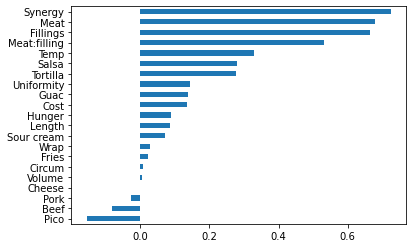

In [ ]:
# Create your horizontal barchart here.

%matplotlib inline
coefficients = pd.Series(model_lr.coef_[0], X_train.columns)
coefficients.sort_values().plot.barh()

There is more than one way to generate predictions with `model_lr`. For instance, you can use [`predict`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logisticregression) or [`predict_proba`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logisticregression#sklearn.linear_model.LogisticRegression.predict_proba).

**Task 9:** Generate predictions for `X_test` using both `predict` and `predict_proba`. Then below, write a summary of the differences in the output for these two methods. You should answer the following questions:

- What data type do `predict` and `predict_proba` output?
- What are the shapes of their different output?
- What numerical values are in the output?
- What do those numerical values represent?

In [ ]:
# Write code here to explore the differences between `predict` and `predict_proba`.

y_pred_proba_test = model_lr.predict_proba(X_test_scaled)
print(y_pred_proba_test)

[[0.01246362 0.98753638]
 [0.07179909 0.92820091]
 [0.9704317  0.0295683 ]
 [0.00536791 0.99463209]
 [0.94794076 0.05205924]
 [0.68551104 0.31448896]
 [0.27661962 0.72338038]
 [0.03798138 0.96201862]
 [0.57668438 0.42331562]
 [0.20853289 0.79146711]
 [0.43322032 0.56677968]
 [0.83876951 0.16123049]
 [0.22659835 0.77340165]
 [0.48250185 0.51749815]
 [0.2661602  0.7338398 ]
 [0.26021391 0.73978609]
 [0.3168014  0.6831986 ]
 [0.93085733 0.06914267]
 [0.96771743 0.03228257]
 [0.9344884  0.0655116 ]
 [0.90730275 0.09269725]
 [0.13573878 0.86426122]
 [0.63796849 0.36203151]
 [0.52368207 0.47631793]
 [0.23879441 0.76120559]
 [0.74793043 0.25206957]
 [0.74421016 0.25578984]
 [0.00553367 0.99446633]
 [0.18711535 0.81288465]
 [0.0700199  0.9299801 ]
 [0.76837418 0.23162582]
 [0.30936177 0.69063823]
 [0.242581   0.757419  ]
 [0.88428736 0.11571264]
 [0.26723713 0.73276287]
 [0.49948203 0.50051797]
 [0.01760781 0.98239219]
 [0.15658662 0.84341338]]


In [ ]:
print(y_pred_test)

[1 1 0 1 0 0 1 1 0 1 1 0 1 1 1 1 1 0 0 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0 1 1 1
 1]


**Give your written answer here:**

Both *predict* and *predict_proba* output a numpy array for the target based on the X_test data

The shape of the *predict_proba* output is a two-element array for each element in the output. The shape of the *predict* output is an array with individual integer elements. 

The numerical values for the *predict* array are 0s and 1s. The numerical values for each element of the *predict_proba* array are floats which add to 1.

The numerical values for the *predict* array represent whether that particular predicted target value is in one category or another (it is predicted to be 1 if the burrito is 'Great'; 0 if it is not). The numerical values for each element of the *predict_proba* array represent the probability as to whether that particular predicted target value is in one category or another (the first element is the probability that the burrito is not great; the second element is the probability that the burrito is 'Great').
```


```